<a href="https://colab.research.google.com/github/KelvinLam05/marketing_analytics/blob/main/marketing_analytics.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Goal of the project**

We have been told by the Chief Marketing Officer that recent marketing campaigns have not been as effective as they were expected to be. We need to analyze the data set to understand this problem.

Exploratory Data Analysis

* Are there any null values or outliers? How will you wrangle/handle them?
* Are there any variables that warrant transformations?
* Are there any useful variables that you can engineer with the given data?

Statistical Analysis

* What factors are significantly related to the number of store purchases?
* Does US fare significantly better than the Rest of the World in terms of total purchases?
* Your supervisor insists that people who buy gold are more conservative. Therefore, people who spent an above average amount on gold in the last 2 years would have more in store purchases. Justify or refute this statement using an appropriate statistical test
* Fish has Omega 3 fatty acids which are good for the brain. Accordingly, do "Married PhD candidates" have a significant relation with amount spent on fish?

Data Visualization

* Which marketing campaign is most successful?
* What does the average customer look like for this company?
* Which products are performing best?
* Which channels are underperforming?

**Load the packages**

In [1860]:
# Importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

In [1861]:
pd.options.mode.chained_assignment = None

**Load the data**

For this project I’ve used the [marketing dataset](https://www.kaggle.com/datasets/lancengck/marketing-data) from the iFood Brain team data challenge for data analysts role. This dataset contains socio-demographic and firmographic features of 2240 customers.

In [1862]:
# Load dataset
df = pd.read_csv('/content/marketing_data.csv').iloc[: , 1:]

In [1863]:
# Rename Pandas columns to lower case
df.columns = df.columns.str.lower()

In [1864]:
df = df.applymap(lambda s: s.lower() if type(s) == str else s)

In [1865]:
# Examine the data
df.head()

,year_birth,education,marital_status,income,kidhome,teenhome,dt_customer,recency,mntwines,mntfruits,...,numstorepurchases,numwebvisitsmonth,acceptedcmp3,acceptedcmp4,acceptedcmp5,acceptedcmp1,acceptedcmp2,response,complain,country
0,1970,graduation,divorced,"$84,835.00",0,0,6/16/14,0,189,104,...,6,1,0,0,0,0,0,1,0,sp
1,1961,graduation,single,"$57,091.00",0,0,6/15/14,0,464,5,...,7,5,0,0,0,0,1,1,0,ca
2,1958,graduation,married,"$67,267.00",0,1,5/13/14,0,134,11,...,5,2,0,0,0,0,0,0,0,us
3,1967,graduation,together,"$32,474.00",1,1,5/11/14,0,10,0,...,2,7,0,0,0,0,0,0,0,aus
4,1989,graduation,single,"$21,474.00",1,0,4/8/14,0,6,16,...,2,7,1,0,0,0,0,1,0,sp


In [1866]:
# Overview of all variables, their datatypes
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 27 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   year_birth           2240 non-null   int64 
 1   education            2240 non-null   object
 2   marital_status       2240 non-null   object
 3    income              2216 non-null   object
 4   kidhome              2240 non-null   int64 
 5   teenhome             2240 non-null   int64 
 6   dt_customer          2240 non-null   object
 7   recency              2240 non-null   int64 
 8   mntwines             2240 non-null   int64 
 9   mntfruits            2240 non-null   int64 
 10  mntmeatproducts      2240 non-null   int64 
 11  mntfishproducts      2240 non-null   int64 
 12  mntsweetproducts     2240 non-null   int64 
 13  mntgoldprods         2240 non-null   int64 
 14  numdealspurchases    2240 non-null   int64 
 15  numwebpurchases      2240 non-null   int64 
 16  numcat

**Preprocess the data**

In [1867]:
# Clean up column names that contain whitespace
df.columns = df.columns.str.replace(' ', '')

In [1868]:
# Transform income column to a numerical
df['income'] = df['income'].str.replace(',','').str.replace('$','').astype('float')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning:

The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.



In [1869]:
import datetime 

In [1870]:
current_year = datetime.date.today().year
current_year

2022

In [1871]:
# Replace 'year_birth' with 'age'
df['age'] = current_year - df['year_birth']

In [1872]:
# Modify date of enrollment to total number of months since enrollment
df['enrollment_month'] = (pd.to_datetime('now') - pd.to_datetime(df['dt_customer'])) // np.timedelta64(1,'M')  

In [1873]:
# Rename the column 'response'
df = df.rename(columns = {'response': 'acceptedcmp6'})

In [1874]:
# Drop unnecessary columns
df = df.drop(['year_birth', 'dt_customer'], axis = 1)

In [1875]:
df.describe()

,income,kidhome,teenhome,recency,mntwines,mntfruits,mntmeatproducts,mntfishproducts,mntsweetproducts,mntgoldprods,...,numwebvisitsmonth,acceptedcmp3,acceptedcmp4,acceptedcmp5,acceptedcmp1,acceptedcmp2,acceptedcmp6,complain,age,enrollment_month
count,2216.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,...,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000
mean,52247.251354,0.444196,0.506250,49.109375,303.935714,26.302232,166.950000,37.525446,27.062946,44.021875,...,5.316518,0.072768,0.074554,0.072768,0.064286,0.013393,0.149107,0.009375,53.194196,109.069643
std,25173.076661,0.538398,0.544538,28.962453,336.597393,39.773434,225.715373,54.628979,41.280498,52.167439,...,2.426645,0.259813,0.262728,0.259813,0.245316,0.114976,0.356274,0.096391,11.984069,6.636384
min,1730.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,26.000000,97.000000
25%,35303.000000,0.000000,0.000000,24.000000,23.750000,1.000000,16.000000,3.000000,1.000000,9.000000,...,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,45.000000,103.000000
50%,51381.500000,0.000000,0.000000,49.000000,173.500000,8.000000,67.000000,12.000000,8.000000,24.000000,...,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,52.000000,109.000000
75%,68522.000000,1.000000,1.000000,74.000000,504.250000,33.000000,232.000000,50.000000,33.000000,56.000000,...,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,63.000000,115.000000
max,666666.000000,2.000000,2.000000,99.000000,1493.000000,199.000000,1725.000000,259.000000,263.000000,362.000000,...,20.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,129.000000,120.000000


We can identify some outliers for both age and income. Seems like we have customers who are over 100 years old, or earn a household income of more than 600,000 USD!

In [1876]:
from plotly.subplots import make_subplots
import plotly.graph_objects as go
from gitly.colab.plot import GitlyPlotter

In [1877]:
gitly = GitlyPlotter('github')

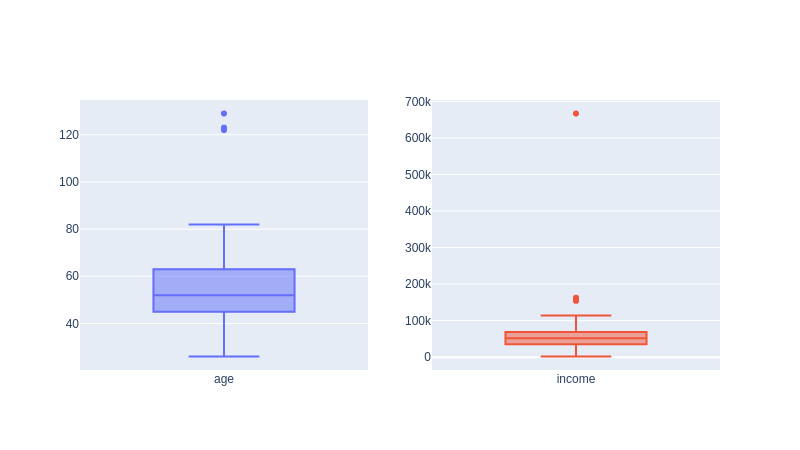

In [1878]:
fig = make_subplots(rows = 1, cols = 2)

fig.add_trace(go.Box(y = df['age'], name = 'age'), row = 1, col = 1)
fig.add_trace(go.Box(y = df['income'], name = 'income'), row = 1, col = 2)

fig.update_layout(showlegend = False)

gitly.show(fig)

We have 4 customers who are outliers. One of them earns 666,666 USD, and three of them are older than 100 years old!

In [1879]:
# Find outliers
outliers_age = df[df['age'] > 100].index

# Remove outliers
df.drop(outliers_age, inplace = True)

In [1880]:
# Find outlier
outliers_income = df[df['income'] > 200000].index

# Remove outlier
df.drop(outliers_income, inplace = True)

In [1881]:
df['education'].value_counts()

graduation    1126
phd            485
master         370
2n cycle       201
basic           54
Name: education, dtype: int64

In terms of education, both '2n cycle' and 'master' refer to the same level of education. This is based off the [Three Cycle System](https://education.ec.europa.eu/education-levels/higher-education/inclusive-and-connected-higher-education/bologna-process) from the European Higher Education Area (EHEA). Therefore, we'll merge the two education levels under 'master'. Also, 'graduation' is a little misleading as an education level. We'll assume that it refers to an "undergraduate" education and rephrase it as such.

In [1882]:
# Replace '2n cycle' with 'master'
df['education'] = df['education'].apply(lambda x: 'master' if str(x) == '2n cycle' else str(x))

In [1883]:
# Replace 'graduation' with 'undergraduate'
df['education'] = df['education'].apply(lambda x: 'undergraduate' if str(x) == 'graduation' else str(x))

In [1884]:
df['marital_status'].value_counts()

married     864
together    578
single      479
divorced    231
widow        77
alone         3
yolo          2
absurd        2
Name: marital_status, dtype: int64

In terms of marital status, 'yolo', 'alone', and 'absurd' can be interpreted and assumed to mean 'single', and as such, these statuses will be merged under 'single'.

In [1885]:
# Merge 'yolo', 'absurd', and 'alone' under 'single'
df['marital_status'] = df['marital_status'].apply(lambda x: 'single' if str(x) in ['alone', 'yolo', 'absurd'] else str(x))

In [1886]:
df['country'].value_counts()

sp     1094
sa      335
ca      268
aus     160
ind     147
ger     120
us      109
me        3
Name: country, dtype: int64

**Check for missing values**

In [1887]:
df.isnull().sum()

education               0
marital_status          0
income                 24
kidhome                 0
teenhome                0
recency                 0
mntwines                0
mntfruits               0
mntmeatproducts         0
mntfishproducts         0
mntsweetproducts        0
mntgoldprods            0
numdealspurchases       0
numwebpurchases         0
numcatalogpurchases     0
numstorepurchases       0
numwebvisitsmonth       0
acceptedcmp3            0
acceptedcmp4            0
acceptedcmp5            0
acceptedcmp1            0
acceptedcmp2            0
acceptedcmp6            0
complain                0
country                 0
age                     0
enrollment_month        0
dtype: int64

We're missing income data for 24 of our customers.

**Define X and y**

In [1888]:
X = df.drop('numstorepurchases', axis = 1)

In [1889]:
y = df['numstorepurchases']

**Create test and train data**

In [1890]:
from sklearn.model_selection import train_test_split

In [1891]:
# Isolate X and y variables, and perform train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)

In [1892]:
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer

In [1893]:
transformer = ColumnTransformer(transformers = [('simple_imputer', SimpleImputer(strategy = 'median'), ['income'])], remainder = 'passthrough')

**Examine collinearity**

Including features that are highly correlated with each other, or are multicollinear, adds noise and inaccuracy, so we need to try and reduce this.

Creating a correlation heatmap is a good way to visualise potential collinearity. The rule of thumb is that if correlation is greater than 0.8 between two independent variables, then multicollinearity would exist.

In [1894]:
X_tr = transformer.fit_transform(X_train)

In [1895]:
X_tr = pd.DataFrame(data = X_tr, columns = X.columns)

In [1896]:
from dython.nominal import associations

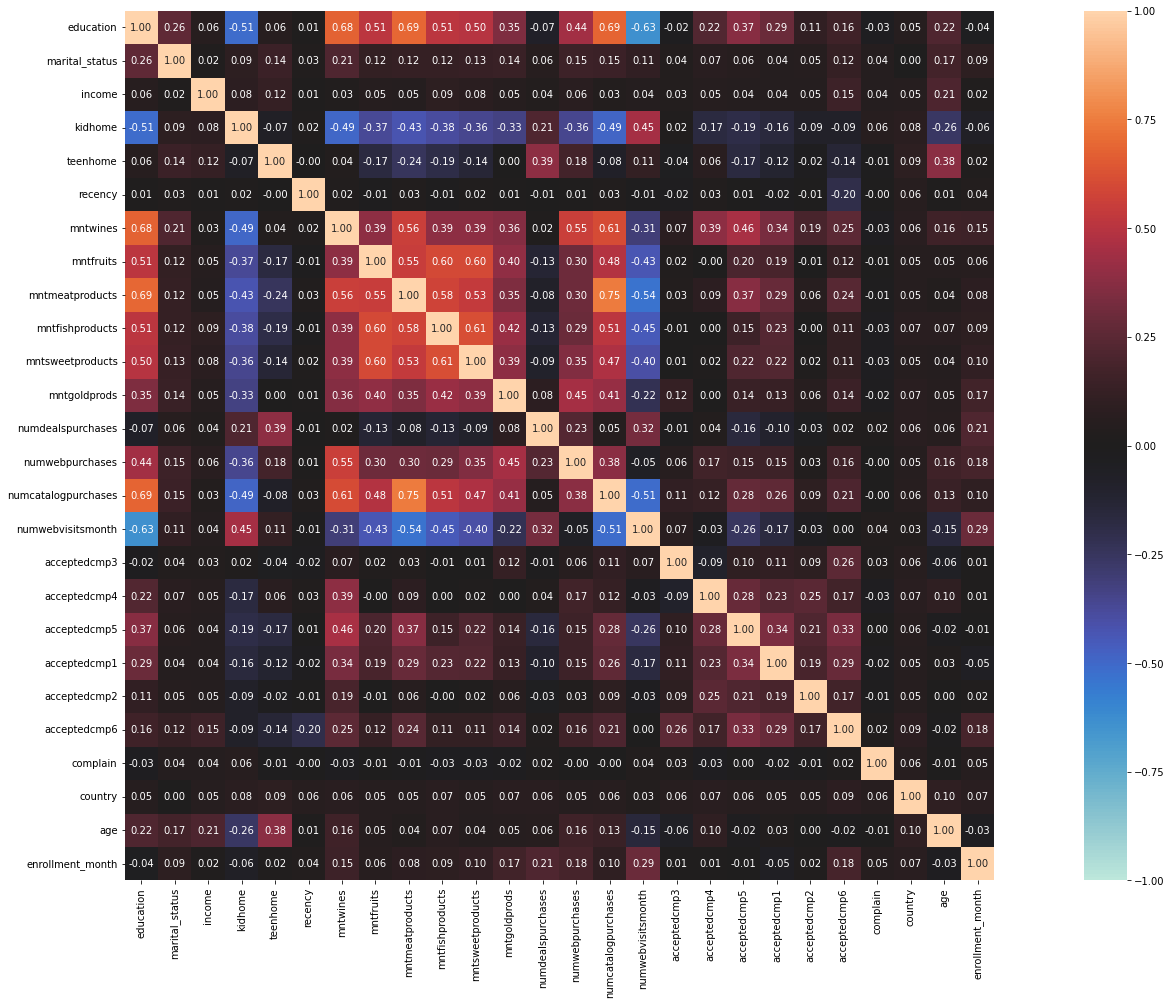

In [1897]:
complete_correlation = associations(X_tr, figsize = (32, 16))

No multicollinearity among the independent variables.

**What factors are significantly related to the number of store purchases?**

We will use a CatBoostRegressor model with 'numstorepurchases' as the target variable, and then use machine learning explainability techniques to get insights about which features predict the number of store purchases.

We constructs a pipeline that imputes any missing values, applies a robust scaler to the  features, converts any categorical features into numerical and then fits a CatBoostRegressor model.

In [1898]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import RobustScaler
from catboost import CatBoostRegressor

In [1899]:
numeric_columns = list(X_train.select_dtypes(exclude = ['object']).columns.values.tolist())
categorical_columns = list(X_train.select_dtypes(include = ['object']).columns.values.tolist())
numeric_transformer = Pipeline(steps = [('simple_imputer', SimpleImputer(strategy = 'median'))])
categorical_transformer = Pipeline(steps = [('one_hot_encoder', OneHotEncoder(sparse = False, handle_unknown = 'ignore'))])

preprocessor = ColumnTransformer(transformers = [('numeric', numeric_transformer, numeric_columns),
                                                 ('categorical', categorical_transformer, categorical_columns)], remainder = 'passthrough')

bundled_pipeline = Pipeline(steps = [('preprocessor', preprocessor),
                                     ('scaler', RobustScaler()),
                                     ('model', CatBoostRegressor(silent = True, random_state = 42))])

In [1900]:
bundled_pipeline.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('numeric',
                                                  Pipeline(steps=[('simple_imputer',
                                                                   SimpleImputer(strategy='median'))]),
                                                  ['income', 'kidhome',
                                                   'teenhome', 'recency',
                                                   'mntwines', 'mntfruits',
                                                   'mntmeatproducts',
                                                   'mntfishproducts',
                                                   'mntsweetproducts',
                                                   'mntgoldprods',
                                                   'numdealspurchases',
                                                   'numwebpurchases',
               

In [1901]:
y_pred = bundled_pipeline.predict(X_test)

In [1902]:
from sklearn.metrics import mean_absolute_error

In [1903]:
mean_absolute_error(y_test, y_pred)

1.1340532189056773

**ELI5**

It is not easy to extract feature importances from this pipeline. However, there is a python library that makes this very simple called ELI5.

Let's use ELI5 to extract feature importances from the pipeline.

ELI5 needs to know all feature names in order to construct feature importances. By applying one-hot encoding to the categorical variables in the pipeline we are introducing a number of new features. We therefore first need to extract these feature names and append them to the known list of numerical features. The code below uses the ‘named_steps’ function built into scikit-learn pipelines to do this.

In [1904]:
one_hot_columns = list(bundled_pipeline.named_steps['preprocessor'].named_transformers_['categorical'].named_steps['one_hot_encoder'].get_feature_names_out(input_features = categorical_columns))

In [1905]:
numeric_features_list = list(numeric_columns)
numeric_features_list.extend(one_hot_columns)

In [1906]:
import eli5

To extract the feature importances we then simply need to run this line of code.

In [1907]:
eli5.explain_weights(bundled_pipeline.named_steps['model'], top = 50, feature_names = numeric_features_list)

Weight,Feature
0.2245,mntwines
0.1172,mntmeatproducts
0.0692,income
0.0661,numcatalogpurchases
0.0563,mntfishproducts
0.0558,mntfruits
0.0553,mntsweetproducts
0.0447,numwebpurchases
0.0438,numwebvisitsmonth
0.0430,mntgoldprods


Here we note that 'mntwines' and 'mntmeatproducts' are the most important features.

**Important Notes**

* The more accurate model is, the more trustworthy computed importances are.

* The computed importances describe how important features are for the CatBoostRegressor model. It is an approximation of how important features are in the data.

**Does US fare significantly better than the Rest of the World in terms of total purchases?**

In [1908]:
totalpurchases = df[['numdealspurchases', 'numwebpurchases', 'numcatalogpurchases', 'numstorepurchases', 'country']]

In [1909]:
# Calculate the total number of purchases made through different channels
totalpurchases['totalpurchases'] = totalpurchases['numdealspurchases'] + totalpurchases['numwebpurchases'] + totalpurchases['numcatalogpurchases'] + totalpurchases['numstorepurchases']

In [1910]:
average_purchases_per_country = totalpurchases.groupby('country').agg(total_purchases = ('totalpurchases', 'sum'))

In [1911]:
average_purchases_per_country['total_customers'] = totalpurchases['country'].value_counts()

In [1912]:
average_purchases_per_country['purchases_per_customer'] = np.floor(average_purchases_per_country['total_purchases'] / average_purchases_per_country['total_customers'])

In [1913]:
average_purchases_per_country.assign(country = average_purchases_per_country.index.get_level_values('country'))

,total_purchases,total_customers,purchases_per_customer,country
country,,,,
aus,2314,160,14.0,aus
ca,4101,268,15.0,ca
ger,1788,120,14.0,ger
ind,2093,147,14.0,ind
me,59,3,19.0,me
sa,5102,335,15.0,sa
sp,16037,1094,14.0,sp
us,1761,109,16.0,us


In [1914]:
average_purchases_per_country.reset_index(inplace = True)

In [1915]:
average_purchases_per_country = average_purchases_per_country.sort_values(by = 'total_purchases', ascending = False)

In [1916]:
import plotly.graph_objects as go

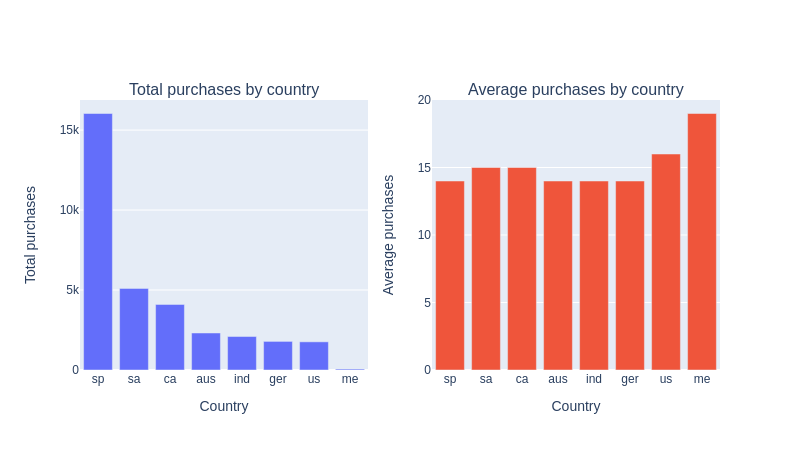

In [1917]:
fig = make_subplots(rows = 1, cols = 2, subplot_titles = ('Total purchases by country', 'Average purchases by country'))

fig.add_trace(go.Bar(x = average_purchases_per_country['country'], y = average_purchases_per_country['total_purchases']), row = 1, col = 1)
fig.add_trace(go.Bar(x = average_purchases_per_country['country'], y = average_purchases_per_country['purchases_per_customer']), row = 1, col = 2)

fig['layout']['xaxis']['title'] = 'Country'
fig['layout']['xaxis2']['title'] = 'Country'
fig['layout']['yaxis']['title'] = 'Total purchases'
fig['layout']['yaxis2']['title'] = 'Average purchases'

fig.update_layout(showlegend = False)

gitly.show(fig)

In terms of total number of purchases, USA doesn't seem to be in a good position. In fact it is the lowest (excluding ME due to only 3 records). However if we look at the purchases made per person in a country, then USA tops the chart.

**Our colleague insists that people who buy gold are more conservative. Therefore, people who spent an above average amount on gold in the last 2 years would have more in store purchases. Justify or refute this statement using an appropriate statistical test**

We begin by specifying the null and alternative hypothesis.

Null Hypothesis H0: Store purchases of people who spend more on gold $ ≤ $ Store purchases of people who spend less on gold

Alternate Hypothesis H1: Store purchases of people who spend more on gold $ > $ Store purchases of people who spend less on gold

In [1918]:
mntgoldprods = df[['mntgoldprods', 'numstorepurchases']]

In [1919]:
mntgoldprods['above_average_mntgoldprods'] = np.where(mntgoldprods['mntgoldprods'] > mntgoldprods['mntgoldprods'].mean(), 'above average', 'below average')

In [1920]:
mntgoldprods['above_average_mntgoldprods'].value_counts()

below average    1533
above average     703
Name: above_average_mntgoldprods, dtype: int64

Following graph shows that many customers who have spent above average amount on gold 'above_average' purchased more items in the store than who spent less than the average on gold. The mean and median of the group 'true' are higher than the group 'below_average'. However, is it statistically significant?

In [1921]:
import plotly.express as px

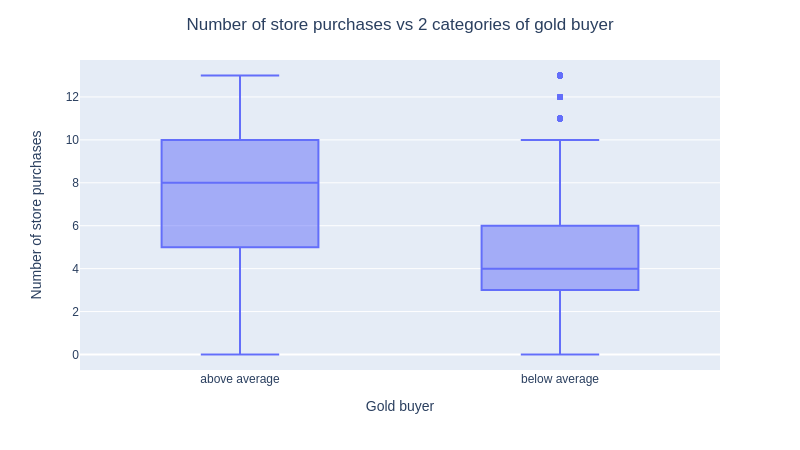

In [1922]:
# Generate boxplot to check data spread
fig = px.box(mntgoldprods, x = 'above_average_mntgoldprods', y = 'numstorepurchases')

fig.update_layout(title_text = 'Number of store purchases vs 2 categories of gold buyer', title_x = 0.5)

fig.update_layout(xaxis_title = 'Gold buyer')
fig.update_layout(yaxis_title = 'Number of store purchases')

gitly.show(fig)

We will tabulate the data (number of in store purchases) for 2 populations, those with above average spend on gold, and those with average or lower spending on gold.

In [1923]:
above_average = mntgoldprods[(mntgoldprods['above_average_mntgoldprods'] == 'above average')]
below_average = mntgoldprods[(mntgoldprods['above_average_mntgoldprods'] == 'below average')]

**Equal sample sizes**

In [1924]:
above_average.shape, below_average.shape

((703, 3), (1533, 3))

We randomly select 703 samples from the 1533 samples in the group of 'below_average'.

In [1925]:
below_average = below_average.sample(703)

Now, two groups have equal sample size. 

In [1926]:
above_average.shape, below_average.shape

((703, 3), (703, 3))

**Homogeneity of variances**

Levene's test is used to check that variances are equal for all samples. 

In [1927]:
import scipy.stats as stats

In [1928]:
stats.levene(above_average['numstorepurchases'], below_average['numstorepurchases'])

LeveneResult(statistic=15.638759392178962, pvalue=8.048902576767652e-05)

The resulting p-value is less than 0.05, we fail to reject the null hypothesis of the variances being equal.

**Normality**

Check residual distribution using Kolmogorov-Smirnov test, 

In [1929]:
from sklearn.preprocessing import scale

In [1930]:
diff = scale(np.array(above_average['numstorepurchases']) - np.array(below_average['numstorepurchases']))

In [1931]:
from scipy.stats import kstest

In [1932]:
kstest(diff, 'norm')

KstestResult(statistic=0.0711000050880169, pvalue=0.0015527924807426162)

As the p-value obtained from the Kolmogorov-Smirnov test is significant (p < 0.05), we conclude that the residuals are not normally distributed. Therefore, Mann-Whitney U test is more appropriate for analyzing two samples.

**Perform Mann-Whitney U test**

Perform one-sided Mann-Whitney U test,

In [1933]:
stats.mannwhitneyu(x = above_average['numstorepurchases'], y = below_average['numstorepurchases'], alternative = 'greater')

MannwhitneyuResult(statistic=378065.5, pvalue=2.3990673662361752e-67)

As the p-value obtained from the Mann-Whitney U test is significant (p < 0.05), we can conclude that store purchases of people who spend more on gold is greater than store purchases of people who spend less on gold. Thus, the supervisor's claim is justified.

**Fish has Omega 3 fatty acids which are good for the brain. Accordingly, do "Married PhD candidates" have a significant relation with amount spent on fish?**

We begin by specifying the null and alternative hypothesis.

$ H_{0}: p_{married} = p_{others} $

$ H_{1}: p_{married} ≠ p_{others} $

In [1934]:
married_phd = df[['marital_status', 'education', 'mntfishproducts']]

In [1935]:
import category_encoders as ce

In [1936]:
one_hot_encoder = ce.OneHotEncoder(cols = ['marital_status', 'education'], use_cat_names = True) 

In [1937]:
married_phd = one_hot_encoder.fit_transform(married_phd)

In [1938]:
married_phd['married_phd'] = married_phd['marital_status_married'] + married_phd['education_phd']

In [1939]:
married_phd['married_phd'] = married_phd['married_phd'].replace({2: 'married phd candidates', 1: 'others', 0: 'others'})

Figure belows show that the mean and median of the group 'others' are slightly higher than the group of married PhD candidates.

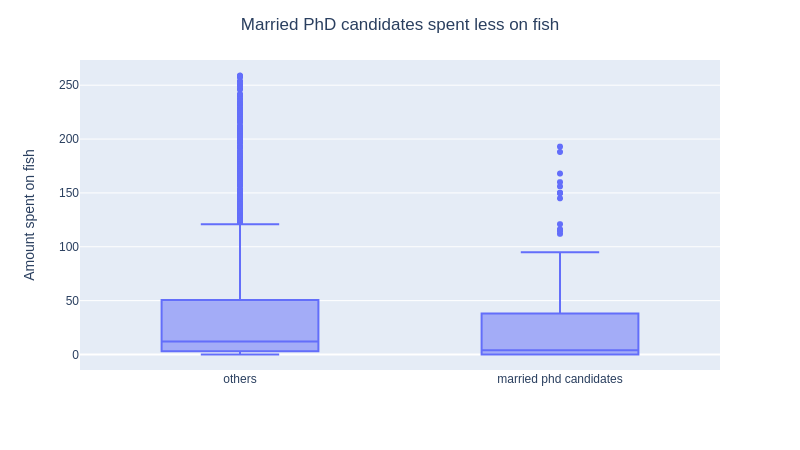

In [1940]:
# Generate boxplot to check data spread
fig = px.box(married_phd, x = 'married_phd', y = 'mntfishproducts')

fig.update_layout(title_text = 'Married PhD candidates spent less on fish', title_x = 0.5)

fig.update_layout(xaxis_title = None)
fig.update_layout(yaxis_title = 'Amount spent on fish')

gitly.show(fig)

We will tabulate the data (amount spent on fish) for 2 populations: married PhD candidates and others. 

In [1941]:
married_phd_candidates = married_phd[(married_phd['married_phd'] == 'married phd candidates')]
others = married_phd[(married_phd['married_phd'] == 'others')]

**Equal sample sizes**

In [1942]:
married_phd_candidates.shape, others.shape

((192, 11), (2044, 11))

We randomly select 192 samples from the 2044 samples in the group of 'others'.

In [1943]:
others = others.sample(192)

Now, two groups have equal sample size.

In [1944]:
married_phd_candidates.shape, others.shape

((192, 11), (192, 11))

**Homogeneity of variances**

Levene's test is used to check that variances are equal for all samples.

In [1945]:
stats.levene(married_phd_candidates['mntfishproducts'], others['mntfishproducts'])

LeveneResult(statistic=4.931860552552718, pvalue=0.026951858332313852)

Levene's test is statistically significant because its p < 0.05: we reject its null hypothesis of equal population variances.

**Normality**

Using the function kstest we can determine whether we should accept the hypothesis that the residuals are from a normal distribution.

In [1946]:
diff = scale(np.array(married_phd_candidates['mntfishproducts']) - np.array(others['mntfishproducts']))

In [1947]:
kstest(diff, 'norm')

KstestResult(statistic=0.15670937625544212, pvalue=0.00013867749469333304)

The p-value is less than 0.05, we can assume the residuals are not normally distributed. Therefore, Mann-Whitney U test is more appropriate for analyzing two samples.

**Perform Mann-Whitney U test**

Perform two-sided Mann-Whitney U test,

In [1948]:
stats.mannwhitneyu(x = married_phd_candidates['mntfishproducts'], y = others['mntfishproducts'], alternative = 'two-sided')

MannwhitneyuResult(statistic=15244.0, pvalue=0.003130501090502508)

Since p-value < 0.025, there is sufficient evidence to prove that married PhD candidates spent significantly less than other customers on fish.

**Is there a significant relationship between geographical regional and success of a campaign?**

We'll be using the chi-square test to determine the association between the two categorical variables, country and acceptedcmp. We begin by specifying the null and alternative hypothesis.

Null Hypothesis H0: The two variables country and acceptedcmp are independent of each other.

Alternate Hypothesis H1: The two variables are related to each other.

In [1949]:
from scipy.stats import chi2_contingency

In [1950]:
acceptedcmp1 = pd.crosstab(df['country'], df['acceptedcmp1'])

In [1951]:
c, p, dof, expected = chi2_contingency(acceptedcmp1)

In [1952]:
p

0.8736949588868972

In [1953]:
acceptedcmp2 = pd.crosstab(df['country'], df['acceptedcmp2'])

In [1954]:
c, p, dof, expected = chi2_contingency(acceptedcmp2)

In [1955]:
p

0.5870888995252126

In [1956]:
acceptedcmp3 = pd.crosstab(df['country'], df['acceptedcmp3'])

In [1957]:
c, p, dof, expected = chi2_contingency(acceptedcmp3)

In [1958]:
p

0.6385182178116886

In [1959]:
acceptedcmp4 = pd.crosstab(df['country'], df['acceptedcmp4'])

In [1960]:
c, p, dof, expected = chi2_contingency(acceptedcmp4)

In [1961]:
p

0.4081803337237639

In [1962]:
acceptedcmp5 = pd.crosstab(df['country'], df['acceptedcmp5'])

In [1963]:
c, p, dof, expected = chi2_contingency(acceptedcmp5)

In [1964]:
p

0.6032248086937475

In [1965]:
acceptedcmp6 = pd.crosstab(df['country'], df['acceptedcmp6'])

In [1966]:
c, p, dof, expected = chi2_contingency(acceptedcmp6)

In [1967]:
p

0.07613726068845521

The results show that there is no significant relationship between geographical regions and the success of a campaign, with a p-value of all countries in all marketing campagins being higher than 0.05. It indicates insufficient evidence to reject the null hypothesis that geographical regionas has no relation to the success of marketing campaign.

We can further verify this by plotting the campaign acceptance rate across different countries.

In [1968]:
acceptedcmp_by_country = df.groupby('country').agg(acceptedcmp1 = ('acceptedcmp1', 'mean'), 
                                                   acceptedcmp2 = ('acceptedcmp2', 'mean'),
                                                   acceptedcmp3 = ('acceptedcmp3', 'mean'),
                                                   acceptedcmp4 = ('acceptedcmp4', 'mean'),
                                                   acceptedcmp5 = ('acceptedcmp5', 'mean'),
                                                   acceptedcmp6 = ('acceptedcmp6', 'mean')).reset_index()

In [1969]:
acceptedcmp_by_country

,country,acceptedcmp1,acceptedcmp2,acceptedcmp3,acceptedcmp4,acceptedcmp5,acceptedcmp6
0,aus,0.043750,0.000000,0.056250,0.037500,0.081250,0.143750
1,ca,0.067164,0.022388,0.067164,0.089552,0.078358,0.141791
2,ger,0.058333,0.016667,0.083333,0.091667,0.066667,0.141667
3,ind,0.047619,0.013605,0.088435,0.074830,0.040816,0.088435
4,me,0.000000,0.000000,0.333333,0.000000,0.000000,0.666667
5,sa,0.059701,0.011940,0.062687,0.059701,0.062687,0.155224
6,sp,0.071298,0.014625,0.075868,0.081353,0.080439,0.160878
7,us,0.064220,0.000000,0.073394,0.055046,0.045872,0.119266


In [1970]:
acceptedcmp_by_country = pd.melt(acceptedcmp_by_country.reset_index(), id_vars = 'country', value_vars = ['acceptedcmp1', 'acceptedcmp2', 'acceptedcmp3', 'acceptedcmp4', 'acceptedcmp5', 'acceptedcmp6'])

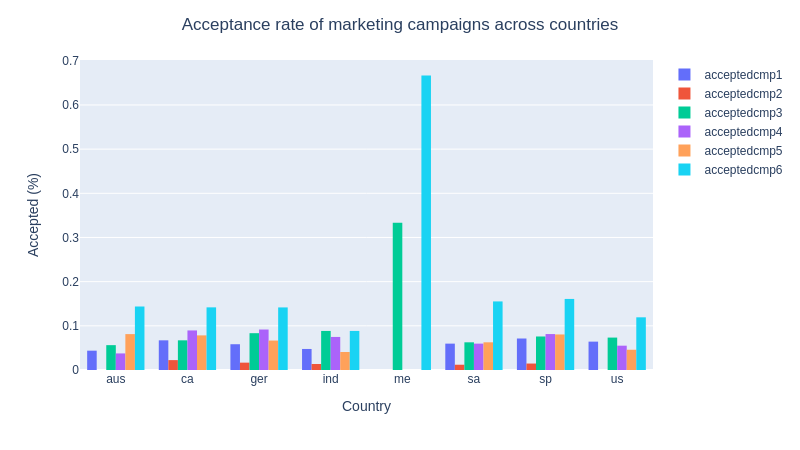

In [1971]:
fig = px.histogram(acceptedcmp_by_country, x = 'country', y = 'value', color = 'variable', barmode = 'group')

fig.update_layout(title_text = 'Acceptance rate of marketing campaigns across countries', title_x = 0.5)

fig.update_layout(xaxis_title = 'Country')
fig.update_layout(yaxis_title = 'Accepted (%)')

fig.update_layout(legend = {'title_text': ''})

gitly.show(fig)

From the chart above, we can see that the acceptance rate (%) of each campaign across the various countries tend to be quite low and rather uniform. Thus, it makes sense and further supports our conclusion that 'country' is not a significant feature to predict campaign success.

Note that the dataset only contains 3 customer datapoints for Mexico, thus the acceptance rate appears to be high (i.e. If 1 customer accepts the campaign, success rate would already be at 33%).

**1. Which marketing campaign is most successful?**

In [1972]:
accepted_cmp = pd.DataFrame(df[['acceptedcmp1', 
                                'acceptedcmp2', 
                                'acceptedcmp3', 
                                'acceptedcmp4', 
                                'acceptedcmp5', 
                                'acceptedcmp6']].mean() * 100, columns = ['accepted_(%)']).sort_values(by = 'accepted_(%)', ascending = False).reset_index()

In [1973]:
accepted_cmp.reset_index(inplace = True)

In [1974]:
accepted_cmp = accepted_cmp.rename(columns = {'index': 'marketing_campaign', 'level_0': 'index'})

In [1975]:
accepted_cmp.set_index('index', inplace = True)

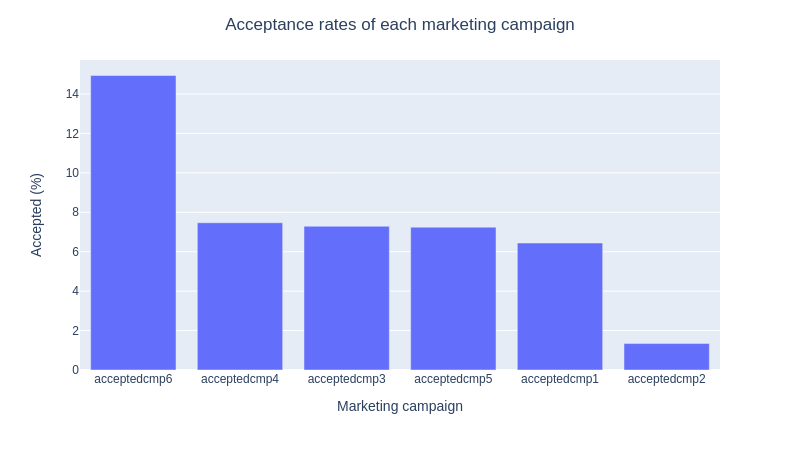

In [1976]:
fig = px.bar(accepted_cmp, x = 'marketing_campaign', y = 'accepted_(%)')

fig.update_layout(title_text = 'Acceptance rates of each marketing campaign', title_x = 0.5)

fig.update_layout(xaxis_title = 'Marketing campaign')
fig.update_layout(yaxis_title = 'Accepted (%)')

gitly.show(fig)

Based on the chart above, we can conclude that the most recent campaign is the most successful one.

**2. What does the average customer look like for this company?**

**2.1 Categorical features**

**2.1.1 Education**

In [1977]:
education = df.groupby('education').agg(count = ('education', 'count'))

In [1978]:
education.assign(education = education.index.get_level_values('education'))

,count,education
education,,
basic,54,basic
master,571,master
phd,485,phd
undergraduate,1126,undergraduate


In [1979]:
education.reset_index(inplace = True)

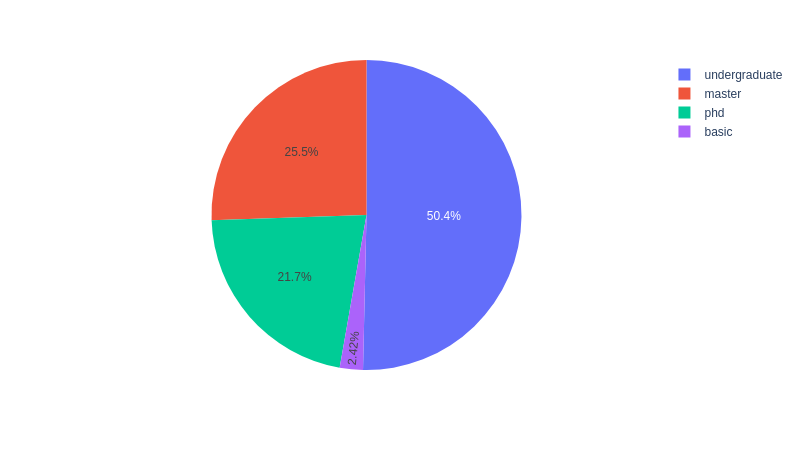

In [1980]:
fig = px.pie(education, values = 'count', names = 'education')

gitly.show(fig)

Overall, most customers have an undergraduate education degree (50.4%).

**2.1.2 Marital status**

In [1981]:
marital_status = df.groupby('marital_status').agg(count = ('marital_status', 'count'))

In [1982]:
marital_status.assign(marital_status = marital_status.index.get_level_values('marital_status'))

,count,marital_status
marital_status,,
divorced,231,divorced
married,864,married
single,486,single
together,578,together
widow,77,widow


In [1983]:
marital_status.reset_index(inplace = True)

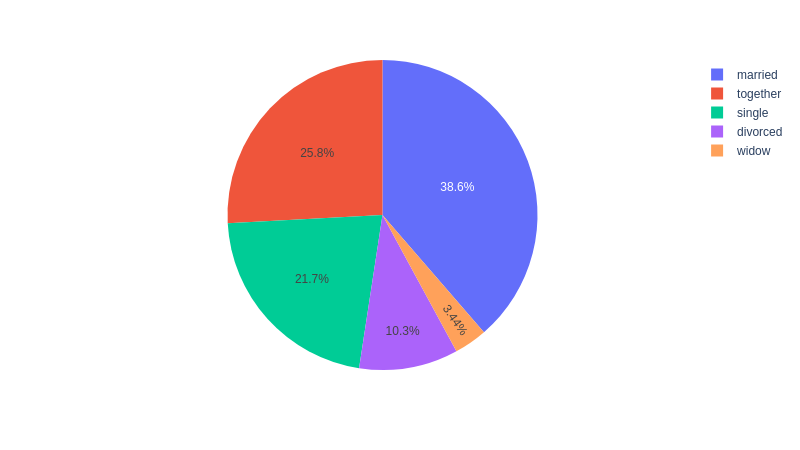

In [1984]:
fig = px.pie(marital_status, values = 'count', names = 'marital_status')

gitly.show(fig)

Nearly 40% of the customers are married, 25.8% staying together, and 21.7% are single.

**2.1.3 Country**

In [1985]:
country = df.groupby('country').agg(count = ('country', 'count'))

In [1986]:
country.assign(country = country.index.get_level_values('country'))

,count,country
country,,
aus,160,aus
ca,268,ca
ger,120,ger
ind,147,ind
me,3,me
sa,335,sa
sp,1094,sp
us,109,us


In [1987]:
country.reset_index(inplace = True)

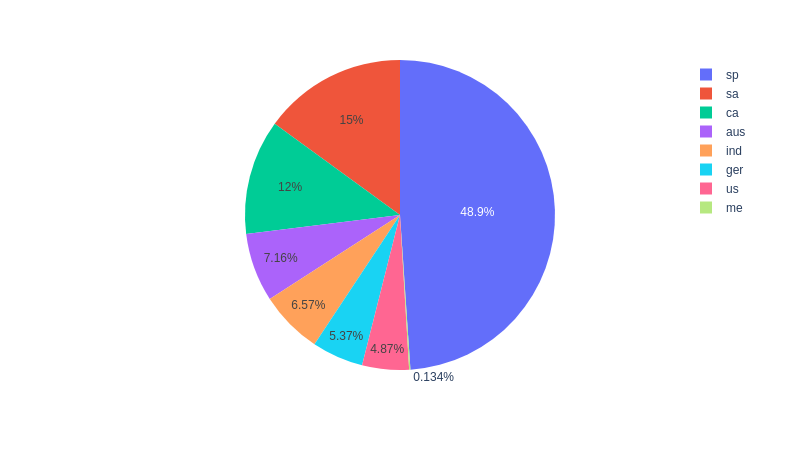

In [1988]:
fig = px.pie(country, values = 'count', names = 'country')

gitly.show(fig)

Nearly half of the customers are from 'SP', which is Spain. The next largest pool of customer is from SA (South Africa) at 15%, then followed by the third CA (Canada) at 12%.

**2.1.4 Dependents**

In [1989]:
dependents = df[['kidhome', 'teenhome']].value_counts().reset_index()

In [1990]:
dependents['index'] = np.arange(1, dependents.shape[0] + 1)

In [1991]:
dependents = dependents.set_index('index')

In [1992]:
dependents['kidhome'] = dependents['kidhome'].astype('string') + 'kid' 

In [1993]:
dependents['kidhome'] = dependents['kidhome'].replace(to_replace = r'(kid)', value = r' \1', regex = True)

In [1994]:
dependents['teenhome'] = dependents['teenhome'].astype('string') + 'teen' 

In [1995]:
dependents['teenhome'] = dependents['teenhome'].replace(to_replace = r'(teen)', value = r' \1', regex = True)

In [1996]:
dependents['dependenthome'] = dependents['kidhome']  + ' & ' + dependents['teenhome']

In [1997]:
dependents = dependents.rename(columns = {0: 'count'})

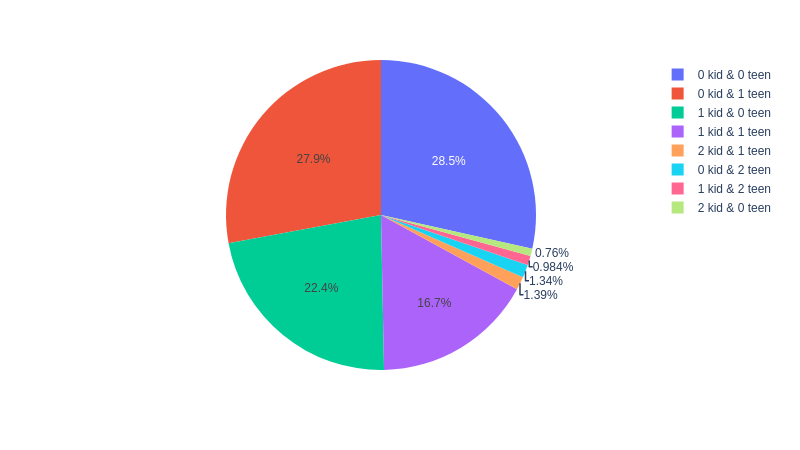

In [1998]:
fig = px.pie(dependents, values = 'count', names = 'dependenthome')

gitly.show(fig)

* Only 28.5% of customers have no children (either at least a kid or teen in the family).

* 71.5% of customers have at least 1 kid or 1 teen in the family.

**2.2 Numerical features**

In [1999]:
numerical_features = pd.DataFrame((df[['age', 'income']].mean()))

In [2000]:
numerical_features = numerical_features.rename(columns = {0: 'numerical_feature'})

In [2001]:
numerical_features

,numerical_feature
age,53.101968
income,51958.810579


The average customer...

* is 53 year old
* is from Spain
* is graduated
* earns around 52,000 USD
* is in a relationship i.e. married or together
* has at least a child (kid or teen)

**3. Which products are performing best?**

In [2002]:
spending = pd.DataFrame(df[['mntwines', 'mntfruits', 'mntmeatproducts', 'mntfishproducts', 'mntsweetproducts', 'mntgoldprods']].mean(), columns = ['average']).sort_values(by = 'average', ascending = False).reset_index()

In [2003]:
spending.reset_index(level = 0, inplace = True)

In [2004]:
spending = spending.rename(columns = {'index': 'amount spent on...', 'level_0': 'index'})

In [2005]:
spending.set_index('index', inplace = True)

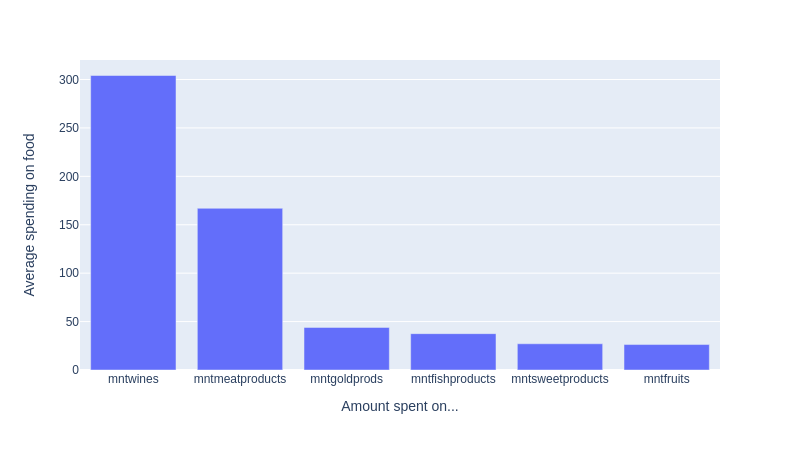

In [1854]:
fig = px.bar(spending, x = 'amount spent on...', y = 'average')

fig.update_layout(xaxis_title = 'Amount spent on...')
fig.update_layout(yaxis_title = 'Average spending on food')

gitly.show(fig)

The average customer spent... 

* 25-50 USD on fruits, sweets, fish, or gold products 
* over 165 USD on meat products 
* over 300 USD on wines
* over 600 USD total

Products performing best:

* wines
* followed by meats

**4. Which channels are underperforming?**

In [2006]:
sales_channels = pd.DataFrame(df[['numdealspurchases', 'numwebpurchases', 'numcatalogpurchases', 'numstorepurchases']].mean(), columns = ['average']).sort_values(by = 'average', ascending = False).reset_index()

In [2007]:
sales_channels.reset_index(level = 0, inplace = True)

In [2008]:
sales_channels = sales_channels.rename(columns = {'index': 'number of...', 'level_0': 'index'})

In [2009]:
sales_channels.set_index('index', inplace = True)

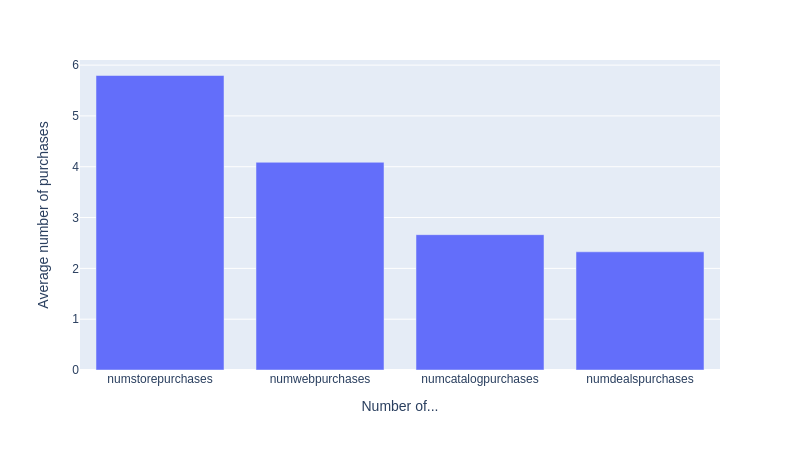

In [1859]:
fig = px.bar(sales_channels, x = 'number of...', y = 'average')

fig.update_layout(xaxis_title = 'Number of...')
fig.update_layout(yaxis_title = 'Average number of purchases')

gitly.show(fig)

The average customer...

* made 2 deals purchases, 2 catalog purchases, 4 web purchases, and 5 store purchases
* averaged 13 total purchases

Underperforming channels:

* deals purchases
* followed by catalog purchases